In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('/content/drive/My Drive/AI ML/Project_2/Project_2/Dataset/hour.csv')
features.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
print('The shape of our features is:', features.shape)

The shape of our features is: (17379, 17)


## **Data Analysis**

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
print(features.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


Already Processed data

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

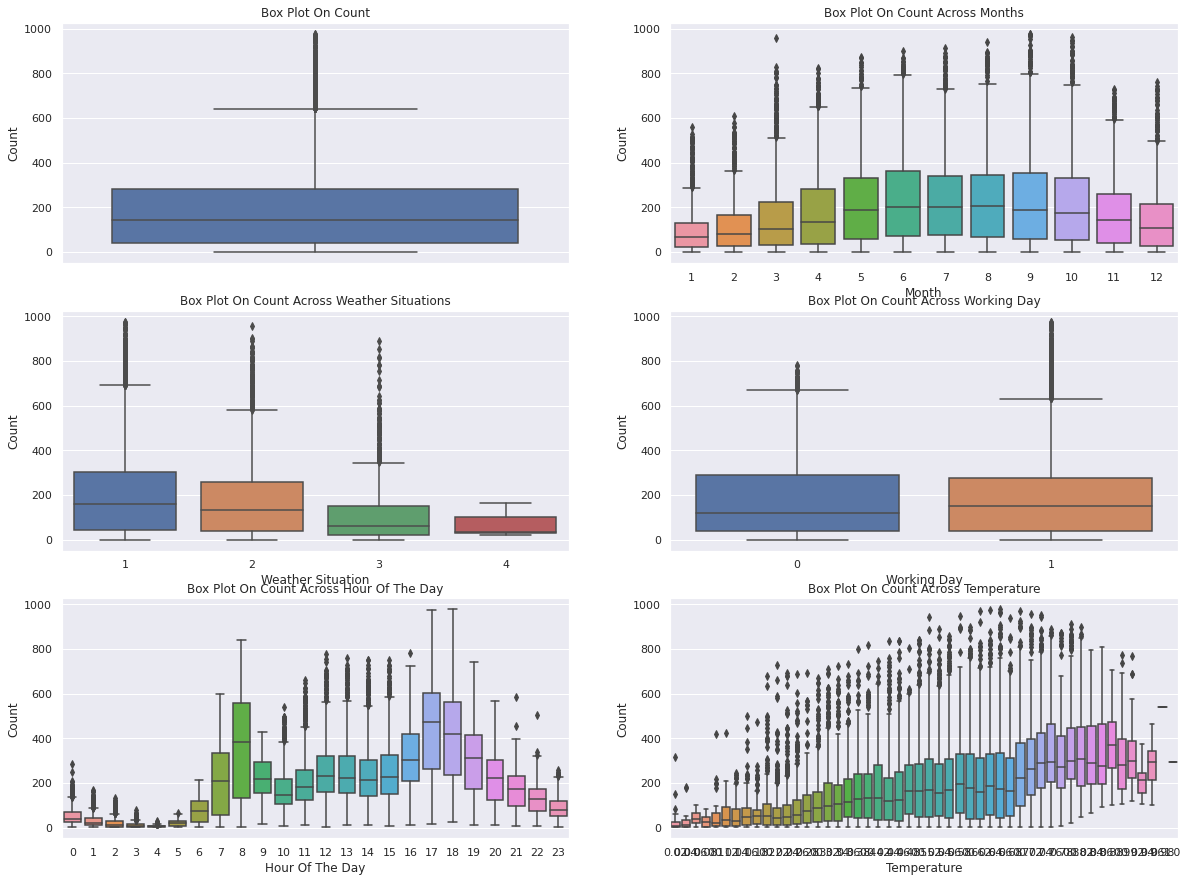

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 15)
sns.boxplot(data=features,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=features,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=features,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=features,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=features,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=features,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

__Interpretation:__ The working day and holiday box plot indicates that more bicycles are rent during normal working days than on weekends or holidays. The hourly box plots show a local maximum at 8 am in the morning and 5pm and 6 pm in the evening. Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.

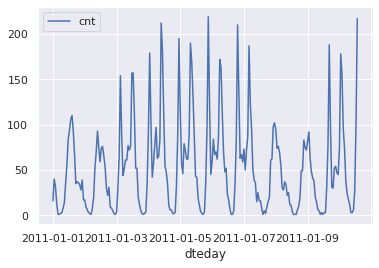

In [20]:
features[:24*10].plot(x='dteday', y='cnt')

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

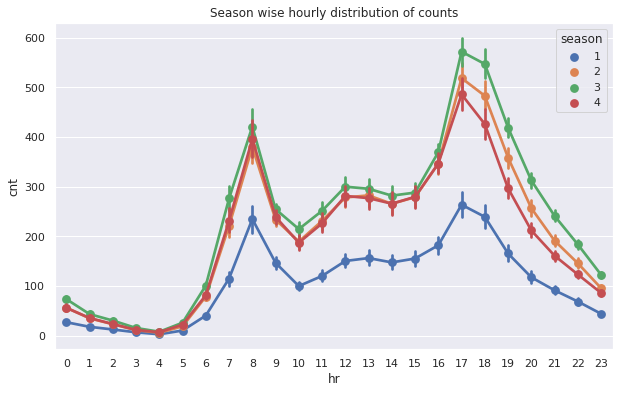

In [21]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.pointplot(data=features[['hr', 'cnt', 'season']],
             x='hr',y='cnt',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

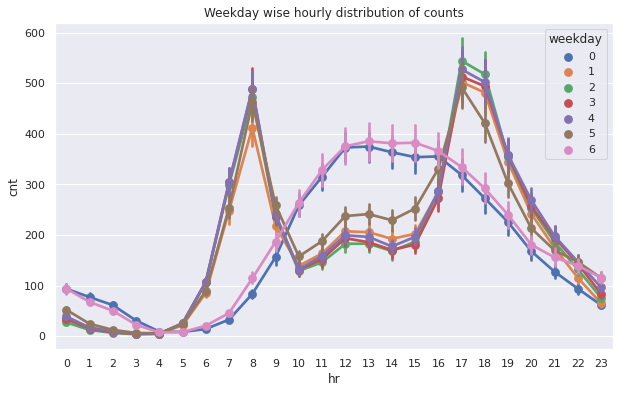

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.pointplot(data=features[['hr', 'cnt', 'weekday']],
             x='hr',y='cnt',
             hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

days 0 and 6 have similar trend.

[Text(0.5, 1.0, 'Monthly distribution of counts')]

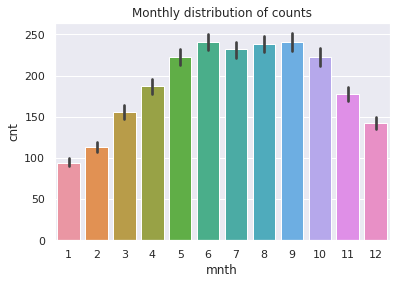

In [23]:
fig,ax = plt.subplots()
sns.barplot(data=features[['mnth',
                         'cnt']],
            x="mnth",y="cnt")
ax.set(title="Monthly distribution of counts")

**Interpretation:** June and September see the highest bike users.

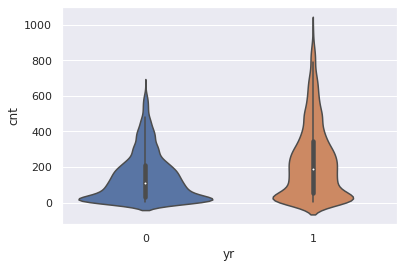

In [24]:
sns.violinplot(data=features[['yr','cnt']],
              x="yr",y="cnt")

### **Correlation Analysis**

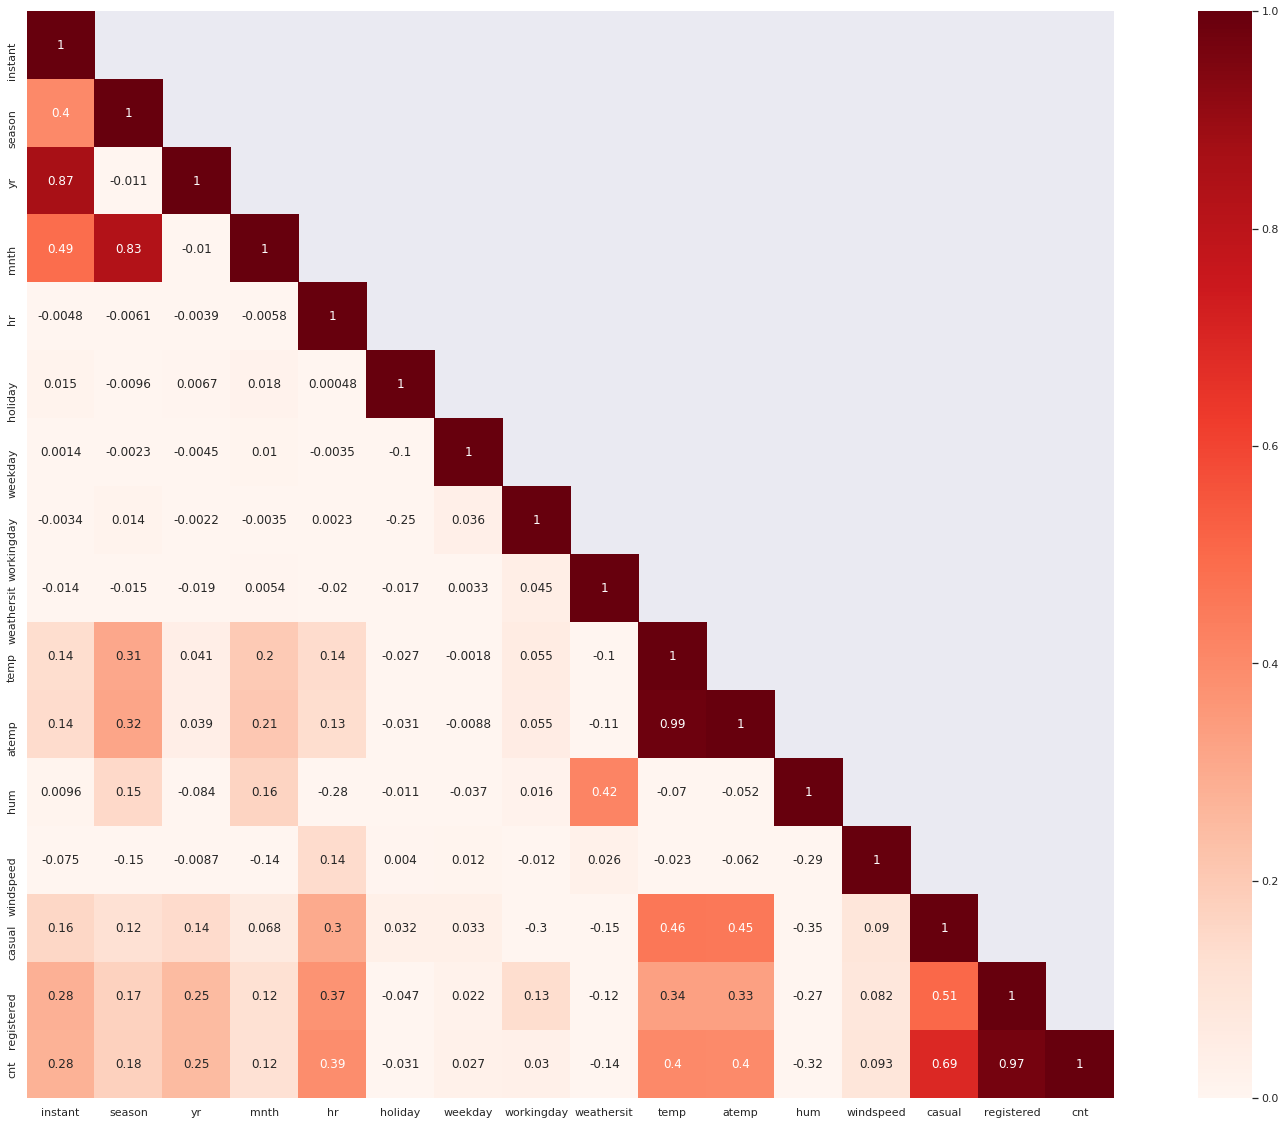

In [27]:
import numpy as np
matrix = features.corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,20)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

In [0]:
# Use numpy to convert to arrays


# Labels are the values we want to predict
labels = np.array(features['cnt'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['cnt', 'instant', 'dteday', 'casual', 'registered'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [29]:
features

array([[ 1.    ,  0.    ,  1.    , ...,  0.2879,  0.81  ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.2727,  0.8   ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.2727,  0.8   ,  0.    ],
       ...,
       [ 1.    ,  1.    , 12.    , ...,  0.2576,  0.6   ,  0.1642],
       [ 1.    ,  1.    , 12.    , ...,  0.2727,  0.56  ,  0.1343],
       [ 1.    ,  1.    , 12.    , ...,  0.2727,  0.65  ,  0.1343]])

### **Split Data**

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [31]:

# Sort validation set for plots

#x_test = test[features].values
from prettytable import PrettyTable
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, accuracy_score
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "Score"]

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, n_estimators=300),
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=40),
                          n_estimators=50, random_state=0)
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)

    mse = mean_squared_error(y_test, y_res)
    score = model.score(x_test, y_test)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+--------------------+-------+
|         Model         | Mean Squared Error | Score |
+-----------------------+--------------------+-------+
|      SGDRegressor     |      20768.98      |  0.35 |
|         Lasso         |      19842.91      |  0.38 |
|       ElasticNet      |      24172.61      |  0.25 |
|         Ridge         |      19836.38      |  0.38 |
|          SVR          |      21536.58      |  0.33 |
|          SVR          |      13836.69      |  0.57 |
|    BaggingRegressor   |      1993.57       |  0.94 |
|    BaggingRegressor   |      8180.53       |  0.75 |
|         NuSVR         |      14086.19      |  0.56 |
| RandomForestRegressor |      1809.67       |  0.94 |
|   AdaBoostRegressor   |      2030.11       |  0.94 |
+-----------------------+--------------------+-------+


In [32]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "Score"]
# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=True)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y) 
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'validation')

print(table)

+-----------------------+------------+---------+-------+-------+-------+
|         Model         |  Dataset   |   MSE   |  MAE  | RMSLE | Score |
+-----------------------+------------+---------+-------+-------+-------+
| RandomForestRegressor |  training  |  373.50 | 11.33 |  0.18 |  0.99 |
| RandomForestRegressor | validation | 1825.33 | 25.63 |  0.36 |  0.94 |
+-----------------------+------------+---------+-------+-------+-------+


In [33]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: hr                   Importance: 0.62
Variable: temp                 Importance: 0.12
Variable: yr                   Importance: 0.08
Variable: workingday           Importance: 0.06
Variable: hum                  Importance: 0.03
Variable: season               Importance: 0.02
Variable: mnth                 Importance: 0.02
Variable: weathersit           Importance: 0.02
Variable: atemp                Importance: 0.02
Variable: weekday              Importance: 0.01
Variable: windspeed            Importance: 0.01
Variable: holiday              Importance: 0.0


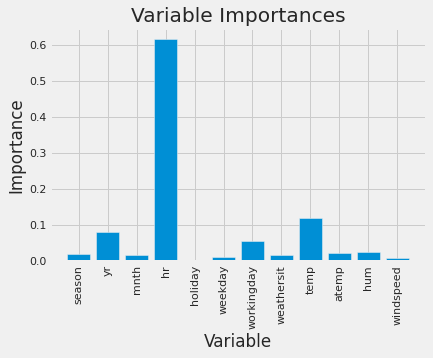

In [34]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

__Interpretation:__ The result corresponds to the high correlation of the hour and temperature variable with the bicycle sharing count in the feature correlation matrix.